# Datascience project

## Voorwoord

Jammer genoeg heb ik niet zoveel tijd kunnen steken in deze opgave als ik wou. Dit komt namelijk omdat ik de opdracht niet goed gelezen had en de opgave verkeerd gemaakt heb voor meerendeels van de tijd die ik hierin gestoken heb. Aan de onderkant van dit project kan men de andere opdracht (voorspellen van signaal sterkte op een bepaalde plek voor een bepaalde router) vinden.

## Inlezen van de data

Er wordt begonnen met het inlezen van de data als een array van de lijnen.
De lijnen zullen meerdere keren gesplit moeten worden om zo een uiteindelijke dataset te krijgen.

In [258]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
lines = []

with open("DataScienceData01.txt","r") as infile:
    lines = infile.readlines()
if True:
    with open("DataScienceData02.txt", "r") as infile:
        lines.extend(infile.readlines())
    

if True:
    with open("DataScienceData03.txt", "r") as infile:
        lines.extend(infile.readlines())

print(lines[1])



Time=12/03 06:08:53& Sender=44:6E:E5:C5:8F:4F& Location=gang@0.61875;0.13758& WifiInfo=ODISEE@88-1d-fc-30-d4-40:-74,campusroam@88-1d-fc-30-d4-43:-74,ODISEE@88-1d-fc-30-d5-50:-72,eduroam@88-1d-fc-30-d4-42:-74,eduroam@88-1d-fc-30-d5-52:-72,campusroam@88-1d-fc-30-d5-53:-73,ODISEEGuest@88-1d-fc-30-d4-41:-75,ODISEEGuest@88-1d-fc-30-d5-51:-73,CiscoC5976@58-6d-8f-19-14-38:-82,rechts@58-6d-8f-19-10-fc:-59,ODISEE@88-1d-fc-41-dc-50:-81,eduroam@88-1d-fc-41-dc-52:-81,campusroam@88-1d-fc-41-dc-53:-67,eduroam@88-1d-fc-2c-c0-02:-78,campusroam@88-1d-fc-2c-c0-03:-71,ODISEE@88-1d-fc-2c-c0-00:-77,telenet-5467D@dc-53-7c-85-46-82:-87,ODISEEGuest@88-1d-fc-41-dc-51:-80,ODISEEGuest@88-1d-fc-2c-c0-01:-73,CiscoC5959@58-6d-8f-19-13-f4:-81,TELENETHOMESPOT@02-53-7c-85-46-83:-86



Dit gebeurt door het gebruik van de dataParse functie:

Deze zal de data splitten en parsen naar dictionary objecten. Vorm in json:
```json
[
    {
        sender = '',
        location = '',
        time = '',
        x = '',
        y = '',
        px = '',
        py = '',
        xmax = '',
        ymax = '',
        WifiInfo= [
            {
                ssid = '',
                mac = '',
                routerid = '',
                signal = ''
            },
            ...
        ]
    },
    ...
]
```
Die worden daarna in een dataframe gestoken.

In [299]:
from datetime import datetime
wifiSignals = []

def dataParse2(l):
    objs = l.split("& ")
    dic = {}
    for obj in objs:
        items = obj.split("=")
        title = items[0]
        data = items[1].split(",")
        if len(data) == 1:
            data = data[0]
        if title == "Time":
            dic[title] = datetime.strptime(data, "%d/%m %H:%M:%S")
            continue
        if title == "Location":
            temp = data.split("@")
            naam = temp[0].lower()
            x, y = temp[1].split(";")
            dic["location"] = naam
            img = plt.imread(naam+'.png')
            height, width, channels = img.shape
            dic["x"] = float(x) * width
            dic["y"] = float(y) * height
            dic["px"] = float(x)
            dic["py"] = float(y)
            dic["xmax"] = width
            dic["ymax"] = height
            continue
        if title == "WifiInfo":
            appendable = []
            for f in data:
                append = {}
                temp = f.replace("\n",'').split('@')
                ti = temp[0]
                append["ssid"] = ti
                temp = temp[1].split(":")
                append["mac"] = temp[0]
                append["routerId"] = "".join(temp[0].split('-'))
                append["routerId"] = append["routerId"][:-2]
                if append["routerId"] not in wifiSignals:
                    wifiSignals.append(append["routerId"])
                append["signal"] = float(temp[1])
                appendable.append(append)
            dic[title] = sorted(appendable, key=lambda k: k["signal"], reverse=True)
            continue
        dic[title] = data
    return dic


data = []
for l in lines:
   data.append(dataParse2(l))




d = pd.DataFrame(data)
print(d.head())

              Sender                Time  \
0  44:6E:E5:C5:8F:4F 1900-03-12 06:08:41   
1  44:6E:E5:C5:8F:4F 1900-03-12 06:08:53   
2  44:6E:E5:C5:8F:4F 1900-03-12 06:09:03   
3  44:6E:E5:C5:8F:4F 1900-03-12 06:09:17   
4  44:6E:E5:C5:8F:4F 1900-03-12 06:09:41   

                                            WifiInfo location       px  \
0  [{'ssid': 'rechts', 'mac': '58-6d-8f-19-10-fc'...     gang  0.65625   
1  [{'ssid': 'rechts', 'mac': '58-6d-8f-19-10-fc'...     gang  0.61875   
2  [{'ssid': 'rechts', 'mac': '58-6d-8f-19-10-fc'...     gang  0.26250   
3  [{'ssid': 'rechts', 'mac': '58-6d-8f-19-10-fc'...     gang  0.63333   
4  [{'ssid': 'rechts', 'mac': '58-6d-8f-19-10-fc'...     gang  0.63958   

        py          x  xmax          y  ymax  
0  0.04449  186.37500   284   49.51737  1113  
1  0.13758  175.72500   284  153.12654  1113  
2  0.13826   74.55000   284  153.88338  1113  
3  0.31006  179.86572   284  345.09678  1113  
4  0.49555  181.64072   284  551.54715  1113  


## Selectie van de data

Nadat de data ingelezen wordt is het een goed idee om het in beeld te brengen zodat we een idee hebben van met wat we gaan werken.


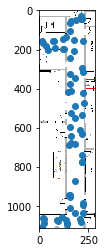

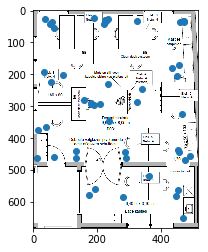

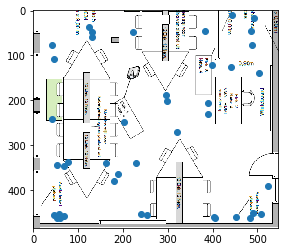

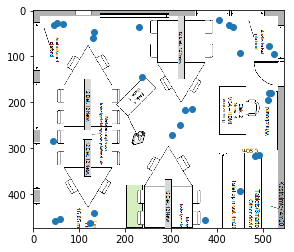

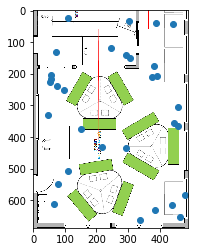

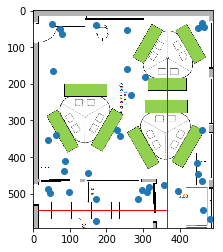

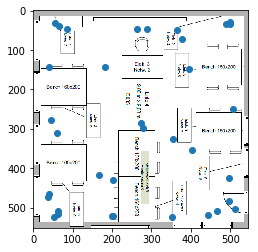

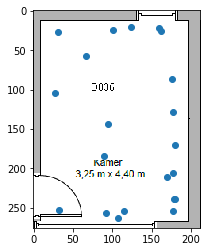

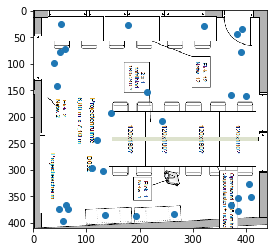

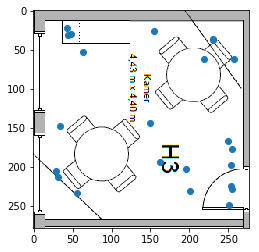

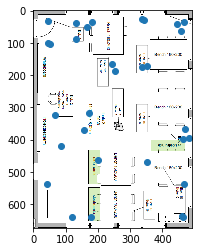

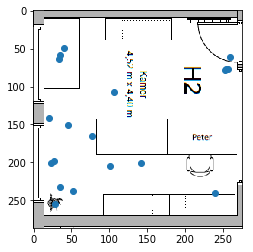

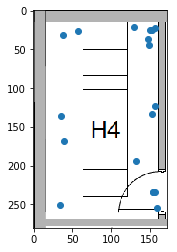

In [260]:
lokalen = d.location.unique().tolist()

for i in lokalen:
    temp = d.loc[d["location"] == i]
    plt.scatter(temp.x, temp.y)
    #print(np.column_stack((temp.x, temp.y)))
    #print(i)
    img = plt.imread(i+'.png')
    #print(img)
    plt.imshow(img)
    plt.show()

Zoals men kan zien zijn er sommige meetpunten dubbel. Moest de data zeer gelijkaardig zijn op deze meetpunten is het misschien een goed idee om deze dan eruit te halen.

In [ ]:

def removeIrelevant(df, minSampleSize=50):
    rdf = []
    returnable = pd.DataFrame()
    for i, v in df.iterrows():
        rdf = CloseToOthers(v, rdf)
    rdf = pd.DataFrame(rdf)
    return rdf

def CloseToOthers(i, df, SpacePerc = .02):
    tdf = pd.DataFrame(df)
    approved = []
    if "location" in tdf:
        l = tdf.loc[tdf["location"] == i["location"]]
        for index, dataframe in l.iterrows():
            temp = abs(dataframe.px - i.px) 
            temp2 = abs(dataframe.py - i.py)
            if temp <= SpacePerc and temp2 <= SpacePerc:# and len(dataframe["WifiInfo"]) > len(i["WifiInfo"]):
                if any(tmp["routerId"] == tmp2["routerId"] for tmp in i["WifiInfo"] for tmp2 in dataframe["WifiInfo"])
                    continue
                return df
        df.append(i)
        return df
    else:
        df.append(i)
        return df
    

In [ ]:
g = removeIrelevant(d)
print("oud: {} \nNieuw: {}".format(len(d), len(g)))

### Training data:

Nadat we de dataset gefilterd hebben, kunnen we beginnen met onze training data voor te bereiden. Om het model te scoren zal er gebruikt worden van een test set, hiervoor gebruiken we dus train test split om zo onze test set te genereren.

Onze x values bestaan uit een lijst van een routerId en signal strength en voor elke x value lijst is er ook een y value die bestaat uit een location, xcoord en ycoord.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer

def prepTraining(df, l=7):
    x = []
    y = []
    scaler = MaxAbsScaler()
    for i, dataframe in df.iterrows():
        tx = []
        for i in sorted(dataframe["WifiInfo"], key=lambda x: x["signal"], reverse=True):
            if i["routerId"] not in tx:
                tx.append(wifiSignals.index(i["routerId"])/len(wifiSignals))
            if len(tx) >= l:
                break
        ty = (lokalen.index(dataframe["location"])/len(lokalen),dataframe["px"], dataframe["py"])
        x.append(tx)
        y.append(ty)
    
    fx = pd.DataFrame(x)
    fy =  pd.DataFrame(y)
    xtrain, xtest, ytrain, ytest = train_test_split(fx, fy)
    scaler.fit(xtrain)
    #xtrain = scaler.transform(xtrain)
    #xtest = scaler.transform(xtest)
    return xtrain, xtest, ytrain, ytest






## Modellen

### Lineare regressie

Het eenvoudigste model voor deze opgave. Vooral afhankelijk van de trainingsdata die het model ontvangt.

In [ ]:
from sklearn.linear_model import LinearRegression


xtrain, xtest, ytrain, ytest = prepTraining(d)


def LinReg():
    lr = LinearRegression().fit(xtrain, ytrain)
    print("Model score:{}".format(lr.score(xtest, ytest)))
    return lr

model = LinReg()

## Gaussian process

Dit is een overblijfsel van hoe ik de opdracht oorspronkelijk zag en ik wou het toepassen op deze data.

In [381]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def GaussProc():
    gp = GaussianProcessRegressor(kernel=RBF(),alpha=.08).fit(xtrain, ytrain)
    print("Model score:{}".format(gp.score(xtest, ytest)))
    return gp
    
model = GaussProc()

Model score:-0.0018899442982293537


## Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def rfor(est=5, dep=50, pr=False):
    lr =  RandomForestRegressor(n_estimators=est, max_depth=dep)
    lr.fit(xtrain, ytrain)
    if pr:
        print("Model score:{}".format(lr.score(xtest, ytest)))
    return lr, lr.score(xtest, ytest)
#Calculating optimal depth
lastScore = 0
optimal = 1
for i in range(1,800000):
    if i == 1:
        model, lastScore = rfor(dep=i)
        continue
    model, score = rfor(dep=i)
    if score > lastScore:
        lastScore = score
        optimal = i
    

print(lastScore)
print(optimal)



## Ridge

In [383]:
from sklearn.linear_model import Ridge

def ridge(alpha=.9):
    lr = Ridge(alpha=alpha)
    lr.fit(xtrain, ytrain)
    print("Model score:{}".format(lr.score(xtest, ytest)))
    return lr

model = ridge()
    

Model score:-0.02514315655055795


## logistic regression

In [384]:
from sklearn.linear_model import LassoLars

def logreg(alpha=.002):
    lr = LassoLars(alpha = alpha)
    lr.fit(xtrain, ytrain)
    print("Model score:{}".format(lr.score(xtest, ytest)))
    return lr


model = logreg()

Model score:0.010811687291708824
